
# Decision Tree Visualization 

This notebook loads a small categorical dataset, trains a Decision Tree classifier with scikit-learn, and visualizes the tree and feature importances.

**What you'll need:**  
- `pandas`, `scikit-learn`, `matplotlib`




In [3]:
# If needed, uncomment and run:
!pip install pandas scikit-learn matplotlib


## 1) Create the dataset

In [5]:
import pandas as pd

data = {
    "Age": ["<=30", "<=30", "31-40", ">40", ">40", ">40", "31-40", "<=30", "<=30", ">40", "<=30", "31-40", "31-40", ">40"],
    "Income": ["High", "High", "High", "Medium", "Low", "Low", "Low", "Medium", "Low", "Medium", "Medium", "Medium", "High", "Medium"],
    "Student": ["No", "No", "No", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "No"],
    "Credit_Rating": ["Fair", "Excellent", "Fair", "Fair", "Fair", "Excellent", "Excellent", "Fair", "Fair", "Fair", "Excellent", "Excellent", "Fair", "Excellent"],
    "Buys_Computer": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}
df = pd.DataFrame(data)
df.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,<=30,High,No,Fair,No
1,<=30,High,No,Excellent,No
2,31-40,High,No,Fair,Yes
3,>40,Medium,No,Fair,Yes
4,>40,Low,Yes,Fair,Yes


## 2) Encode categoricals and train the decision tree

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns=["Buys_Computer"])
y = df["Buys_Computer"]

categorical_cols = X.columns.tolist()

preprocess = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)]
)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)

pipe = Pipeline(steps=[("preprocess", preprocess),
                      ("model", clf)])

pipe.fit(X, y)
print("Model trained.")

Model trained.


## 3) Visualize the tree

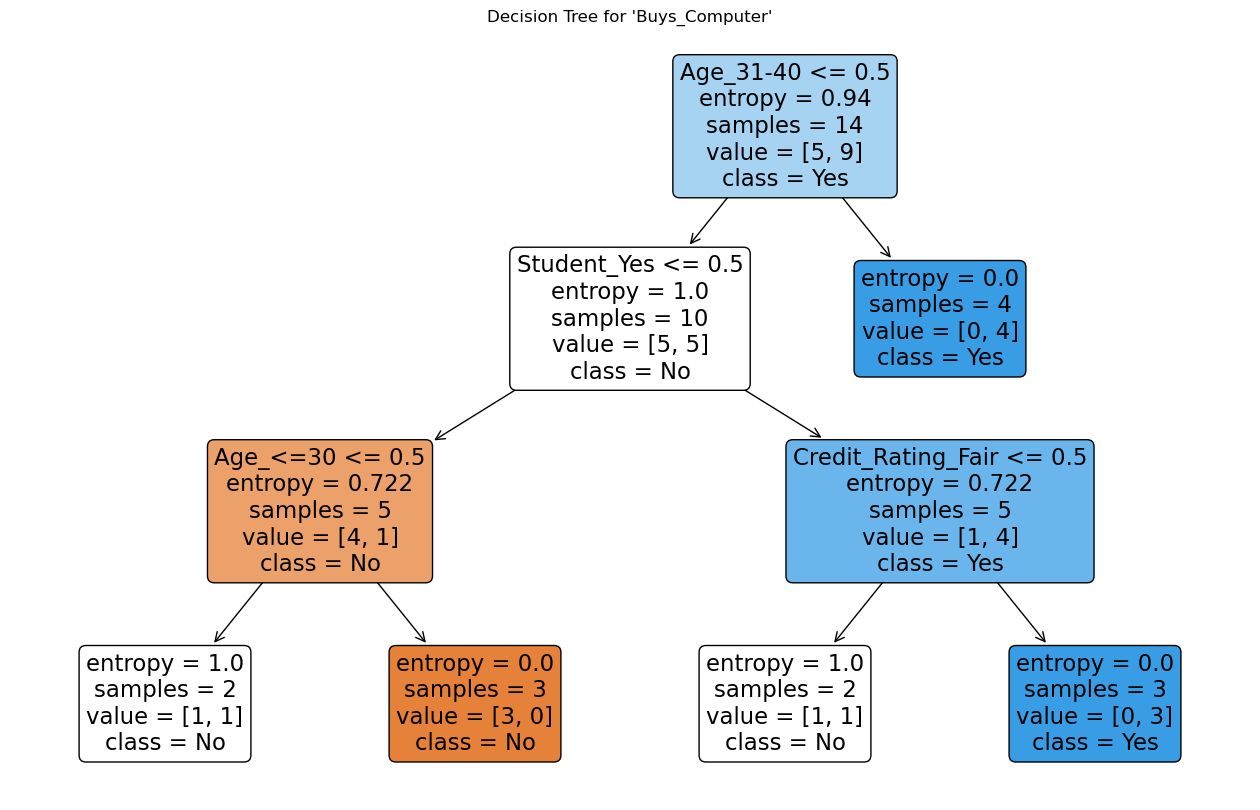

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

# Get feature names after one-hot encoding
ohe: OneHotEncoder = pipe.named_steps["preprocess"].named_transformers_["cat"]
feature_names = ohe.get_feature_names_out(categorical_cols)

plt.figure(figsize=(16, 10))
tree.plot_tree(
    pipe.named_steps["model"],
    feature_names=feature_names,
    class_names=np.unique(y),
    filled=True,
    rounded=True
)
plt.title("Decision Tree for 'Buys_Computer'")
plt.show()

## 4) Feature importances

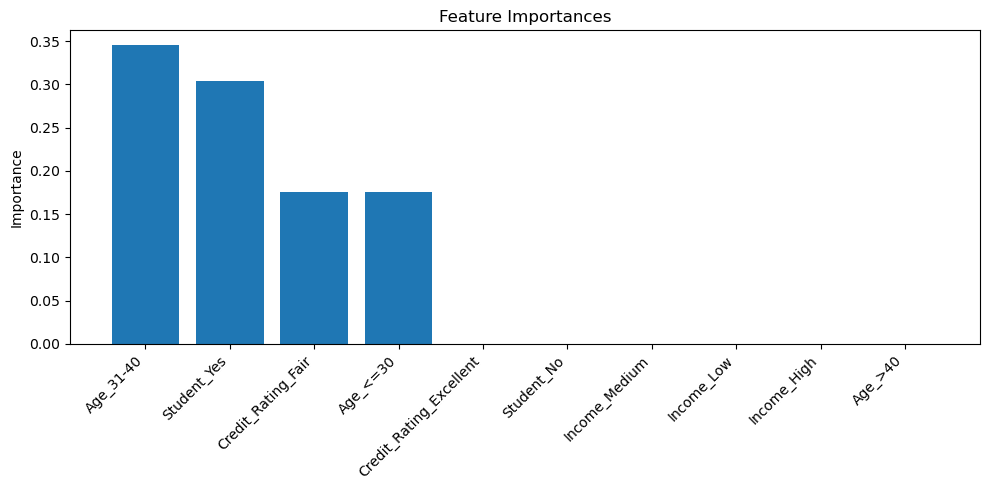

In [11]:
import matplotlib.pyplot as plt

importances = pipe.named_steps["model"].feature_importances_
idx = importances.argsort()[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[idx])
plt.xticks(range(len(importances)), feature_names[idx], rotation=45, ha="right")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

## 5) Make a sample prediction

In [13]:
sample = pd.DataFrame([{
    "Age": "<=30",
    "Income": "Medium",
    "Student": "Yes",
    "Credit_Rating": "Fair"
}])
pred = pipe.predict(sample)[0]
print("Prediction for sample input:", pred)

Prediction for sample input: Yes
